C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Best alpha using built-in LassoCV: 0.009444
Best score using built-in LassoCV: 0.953236
LassoCV coefficients: [1.79701555]
LassoCV intercept: 4.797536545076616
Prediction for [9] is 20.970676469209266


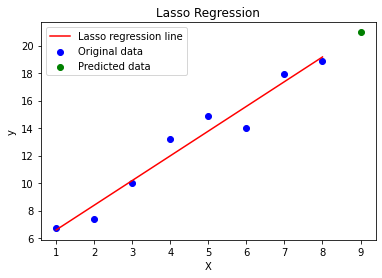

In [1]:
import numpy as np
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(0)

X = np.array([[1], [2], [3], [4], [5], [6], [7], [8]])
# y = 2 * x + 3 + noise
y = np.dot(X, np.array([2])) + 3 + np.random.normal(0, 1, len(X))
# Create a LassoCV model and fit it to the data
reg = LassoCV(cv=5, random_state=0)  # you can adjust the number of folds (cv) as needed
reg.fit(X, y)

print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
print("LassoCV coefficients:", reg.coef_)
print("LassoCV intercept:", reg.intercept_)

# Predicting for a new data point
new_point = np.array([[9]])
prediction = reg.predict(new_point)
print(f'Prediction for {new_point[0]} is {prediction[0]}')

# Plotting the original data points
plt.scatter(X[:, 0], y, color='blue', label='Original data')

# Plotting the regression line
x_range = np.linspace(min(X[:, 0]), max(X[:, 0]), num=100)
y_range = reg.coef_[0]*x_range + reg.intercept_
plt.plot(x_range, y_range, color='red', label='Lasso regression line')

# Plotting the predicted data point
plt.scatter(new_point[:, 0], prediction, color='green', label='Predicted data')

plt.title('Lasso Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()